In [19]:
#importing data and required packages

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle, gzip
with gzip.open('MNIST.pkl.gz') as f:
  data = pickle.load(f)
  traind = data["data_train"].reshape(-1, 28, 28)
  trainl = data["labels_train"]


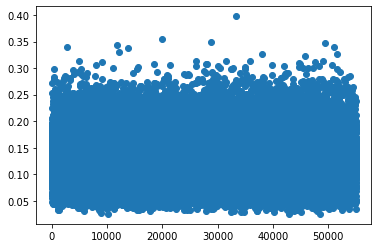

In [6]:
#1. numpy & matplotlib with MNIST

#a - scatter plot for image-wise pixel mean
x = np.arange(0, 55000)
img_wise_pix = traind.mean(axis=(1,2))
plt.scatter(x, img_wise_pix)
plt.show()


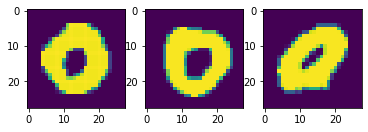

In [13]:
#b copy out all the samples whose mean over pixel is > 0.3

mean = traind.mean(axis=(1,2))
mask = mean > 0.3
copy_data = traind[mask]
fig = plt.figure()
for i in range(1,4):
  fig.add_subplot(1,3,i)
  plt.imshow(copy_data[i])
plt.show()


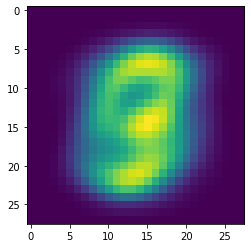

In [15]:
#c compute average image and display it

avg_img = traind.mean(axis=0)
plt.imshow(avg_img)
plt.show()

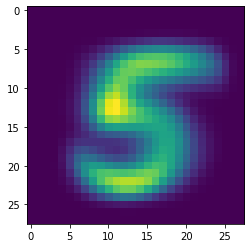

In [18]:
#d compute the average image for samples of class 5 and display it

scalarClass5 = trainl.argmax(axis=1)
mask = (scalarClass5 == 5)
avg_img5 = traind[mask].mean(axis=0)
plt.imshow(avg_img5)
plt.show()

In [25]:
# Implementing Softmax with numpy and tensorFlow

#using numpy
def S(x):
  e = np.exp(x)
  return e/e.sum()

#using tensorFlow
def ST(x):
  e = tf.math.exp(x)
  return e/tf.reduce_sum(e)

x1 = tf.constant([-1., -1., 5.])
x2 = tf.constant([1., 1., 2.])

print("Softmax using Numpy:", S(x1))
print("Softmax using Numpy:", S(x2))

print("---------------------")

print("Softmax using TensorFlow:", ST(x1).numpy())
print("Softmax using TensorFlow:", ST(x2).numpy())


Softmax using Numpy: [0.00246652 0.00246652 0.99506694]
Softmax using Numpy: [0.21194157 0.21194157 0.57611686]
---------------------
Softmax using TensorFlow: [0.00246652 0.00246652 0.99506694]
Softmax using TensorFlow: [0.21194156 0.21194156 0.5761169 ]


In [47]:
#Implementing cross-entropy

#using numpy
def CE(y, t):
  kstar = np.argmax(t)
  return -math.log(y[kstar])

#alternate numpy
# return np.sum(-(np.log(y)*t))

#using tensorFlow
def CET(y, t):
  return tf.reduce_sum(-tf.math.log(y)*t)

t = tf.constant([0., 0., 1.])
y1 = tf.constant([0.1, 0.1, 0.8])
y2 = tf.constant([0.3, 0.3, 0.4])
y3 = tf.constant([0.8, 0.1, 0.1])

print("CrossEntropy using Numpy:", CE(y1, t))
print("CrossEntropy using Numpy:", CE(y2, t))
print("CrossEntropy using Numpy:", CE(y3, t))

print("---------------------")

print("CrossEntropy using TensorFlow:", CET(y1, t).numpy())
print("CrossEntropy using TensorFlow:", CET(y2, t).numpy())
print("CrossEntropy using TensorFlow:", CET(y3, t).numpy())

CrossEntropy using Numpy: 0.22314353
CrossEntropy using Numpy: 0.9162907
CrossEntropy using Numpy: 2.3025851
---------------------
CrossEntropy using TensorFlow: 0.22314353
CrossEntropy using TensorFlow: 0.9162907
CrossEntropy using TensorFlow: 2.3025851
